# Part 0 - Preliminaries

## Install Libraries

In [40]:
#%pip install category_encoders

## Import Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,  MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

# Apply Seaborn's aesthetic parameters to match Matplotlib's style
sns.set()


pd.set_option('display.max_columns', None)

# Load Data

Data:
- 3376 rows
- 46 column

Next: Check for categorical and numerical variables

In [42]:
df = pd.read_csv("2016_Building_Energy_Benchmarking.csv")
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

# Categoical Variables

In [43]:
print("Catgorical Variables:\n")
cat_columns = df.select_dtypes(include=[object]).columns.tolist()
for col in cat_columns:
    print(f"\t- {col}")

df[cat_columns].head()

Catgorical Variables:

	- BuildingType
	- PrimaryPropertyType
	- PropertyName
	- Address
	- City
	- State
	- TaxParcelIdentificationNumber
	- Neighborhood
	- ListOfAllPropertyUseTypes
	- LargestPropertyUseType
	- SecondLargestPropertyUseType
	- ThirdLargestPropertyUseType
	- YearsENERGYSTARCertified
	- ComplianceStatus
	- Outlier


,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,ComplianceStatus,Outlier
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,Compliant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,Compliant,NaN


# Numerical Variables

In [44]:
print("Numerical Variables:\n")
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_columns:
    print(f"\t- {col}")

df[num_columns].head()

Numerical Variables:

	- OSEBuildingID
	- DataYear
	- ZipCode
	- CouncilDistrictCode
	- Latitude
	- Longitude
	- YearBuilt
	- NumberofBuildings
	- NumberofFloors
	- PropertyGFATotal
	- PropertyGFAParking
	- PropertyGFABuilding(s)
	- LargestPropertyUseTypeGFA
	- SecondLargestPropertyUseTypeGFA
	- ThirdLargestPropertyUseTypeGFA
	- ENERGYSTARScore
	- SiteEUI(kBtu/sf)
	- SiteEUIWN(kBtu/sf)
	- SourceEUI(kBtu/sf)
	- SourceEUIWN(kBtu/sf)
	- SiteEnergyUse(kBtu)
	- SiteEnergyUseWN(kBtu)
	- SteamUse(kBtu)
	- Electricity(kWh)
	- Electricity(kBtu)
	- NaturalGas(therms)
	- NaturalGas(kBtu)
	- Comments
	- TotalGHGEmissions
	- GHGEmissionsIntensity


,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,0,88434,88434.0,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,NaN,249.98,2.83
1,2,2016,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,83880.0,15064.0,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,NaN,295.86,2.86
2,3,2016,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,756493.0,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,NaN,2089.28,2.19
3,5,2016,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,0,61320,61320.0,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,NaN,286.43,4.67
4,8,2016,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,123445.0,68009.0,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,NaN,505.01,2.88


# Missing Values

Action: Remove all columns that have 100% missing values

Result: One column with 100% missing values was removed

In [45]:
# Function to drop missing and duplicate values
def clean_data(df):
    """
    Function to drop all columns with 100% missing values and duplicate rows.
    :param df: Input pandas DataFrame
    """
    # Drop columns with 100% missing values
    df.dropna(how="all", axis="columns", inplace=True)
    
    # Drop duplicate rows
    df.drop_duplicates(inplace=True)

clean_data(df)

df.shape

(3376, 45)

# Missing Values

Action: Determine the percentage of missing values in each column

In [46]:
def missing_data_info(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function to calculate the percentage of missing data for each column and the indices of rows with missing data.

    Args:
    - df (pd.DataFrame): Input dataframe

    Returns:
    - pd.DataFrame: A dataframe with columns 'percentage_missing' and 'missing_rows'
    """

    # Percentage of missing data for each column
    missing_percentage = df.isnull().mean() * 100

    # Rows where data is missing for each column
    missing_rows = df.apply(lambda col: df[col.name][col.isnull()].index.tolist())

    # Combining the results
    result_df = pd.DataFrame({
        'percentage_missing': missing_percentage,
        'missing_rows': missing_rows
    })

    # Filter out columns with 0% missing data
    result_df = result_df[result_df['percentage_missing'] > 0]

    return result_df.round(2)

missing_data_info_df = missing_data_info(df)
missing_data_info_df

,percentage_missing,missing_rows
ZipCode,0.47,"[3360, 3361, 3362, 3363, 3364, 3365, 3366, 336..."
NumberofBuildings,0.24,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670]"
ListOfAllPropertyUseTypes,0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
LargestPropertyUseType,0.59,"[353, 578, 758, 1077, 1147, 1483, 1756, 1768, ..."
LargestPropertyUseTypeGFA,0.59,"[353, 578, 758, 1077, 1147, 1483, 1756, 1768, ..."
SecondLargestPropertyUseType,50.27,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 19, 20, 2..."
SecondLargestPropertyUseTypeGFA,50.27,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 19, 20, 2..."
ThirdLargestPropertyUseType,82.35,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
ThirdLargestPropertyUseTypeGFA,82.35,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
YearsENERGYSTARCertified,96.48,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


## Missing Values - Outliers

Question:
- Why are there so many missing values for....
    - SecondLargestPropertyUseType
    - SecondLargestPropertyUseTypeGFA
    - ThirdLargestPropertyUseType
    - ThirdLargestPropertyUseTypeGFA
    - YearsENERGYSTARCertified
    - ENERGYSTARScore	
    - Outlier
- What does GFA mean?

Actions:
- Check unique values
- Check rows where there are not missing values to understand better
- Google GFA
- PropertyGFATotal isn't the sum of PropertyGFABuilding(s) & PropertyGFATotal

$$  PropertyGFATotal \neq PropertyGFABuilding(s) + PropertyGFATotal $$


Results:
- Missing values are not outliers so we can replace missing values with "Not outlier" value
- Gross floor area, total floor area ($m^2$) inside the building envelope, including the external walls, and excluding the roof - [link](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)

In [47]:
print(df["Outlier"].unique().tolist())

display(df.dropna(subset = "Outlier").head(10))

df["Outlier"] = df["Outlier"].fillna('Not outlier').astype(str)

def count_years(column: pd.Series) -> pd.Series:
    """
    Function to count the number of years (represented as 4-digit numbers) in each string in the given series.
    If a value is NaN, it returns 0.
    
    Args:
    - column (pd.Series): Input series with strings containing concatenated years
    
    Returns:
    - pd.Series: A series with counts of years for each string
    """
    return column.fillna('').astype(str).apply(lambda x: len([x[i:i+4] for i in range(0, len(x), 4)]))

# Transform Column
df["YearsENERGYSTARCertified"] = count_years(df["YearsENERGYSTARCertified"])

# Create Column
df["No.PropertyTypes"] = df["ListOfAllPropertyUseTypes"].str.split(",").apply(lambda x: len(x) if type(x) == list else np.nan)

# Clean Columns
df["SecondLargestPropertyUseType"].fillna("No Secondary Property", inplace = True)
df["ThirdLargestPropertyUseType"].fillna("No Third Property", inplace = True)
df["LargestPropertyUseTypeGFA"] = df["LargestPropertyUseTypeGFA"].fillna(0)
df["SecondLargestPropertyUseTypeGFA"] = df["SecondLargestPropertyUseTypeGFA"].fillna(0)
df["ThirdLargestPropertyUseTypeGFA"] = df["ThirdLargestPropertyUseTypeGFA"].fillna(0)

[nan, 'High outlier', 'Low outlier']


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0,0942000045,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,25920,146922,"Data Center, Office, Parking",Office,99890.0,Data Center,39336.0,Parking,25000.0,NaN,NaN,297.399994,299.200012,909.599976,911.500000,4.139950e+07,4.165040e+07,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,False,Non-Compliant,High outlier,362.66,2.10
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0,5335200380,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,69492,0,69492,Retail Store,Retail Store,69800.0,Other,0.0,NaN,NaN,NaN,100.0,4.600000,4.600000,14.300000,14.300000,3.189628e+05,3.189628e+05,0.0,9.348260e+04,318963.0,0.000000,0.0,False,Non-Compliant,Low outlier,2.22,0.03
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0,5247800200,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,154159,0,154159,Office,Office,193154.0,NaN,NaN,NaN,NaN,NaN,100.0,58.000000,58.799999,28.000000,28.700001,1.119592e+07,1.134876e+07,0.0,4.715030e+05,1608768.0,3430.500488,343050.0,False,Non-Compliant,Low outlier,29.43,0.19
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0,7666202110,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,1.0,4,129551,42500,87051,"Data Center, Office, Parking",Office,82273.0,Parking,42500.0,Data Center,4778.0,NaN,1.0,311.700012,311.700012,978.900024,978.900024,2.713719e+07,2.713719e+07,0.0,7.953454e+06,27137187.0,0.000000,0.0,False,Non-Compliant,High outlier,189.18,1.46
720,19708,2016,Multifamily HR (10+),High-Rise Multifamily,Bay Vista,2821 2nd Ave,Seattle,WA,98121.0,0586400000,7,DOWNTOWN,47.61706,-122.35141,1982,1.0,24,167941,0,167941,"Multifamily Housing, Swimming Pool",Multifamily Housing,138787.0,Parking,99952.0,Swimming Pool,0.0,NaN,100.0,17.299999,18.700001,50.400002,54.000000,2.407904e+06,2.589126e+06,0.0,6.265616e+05,2137828.0,2700.760010,270076.0,False,Non-Compliant,Low outlier,29.25,0.17
834,19934,2016,Multifamily LR (1-4),Low-Rise Multifamily,Belmont Lofts,231 Belmont Ave E,Seattle,WA,98102.0,0704600000,3,EAST,47.62059,-122.32440,1989,1.0,4,31702,0,31702,"Multifamily Housing, Parking",Multifamily Housing,26418.0,Parking,14280.0,NaN,NaN,NaN,NaN,9.700000,10.400000,30.400000,32.700001,2.559712e+05,2.754120e+05,0.0,7.502090e+04,255971.0,0.000000,0.0,False,Non-Compliant,Low outlier,1.78,0.06
839,19967,2016,SPS-District K-12,K-12 School,Queen Anne Gym,1431 2nd Ave N,Seattle,WA,98109.0,0811000005,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1.0,1,35805,0,35805,K-12 School,K-12 School,35805.0,NaN,NaN,NaN,NaN,NaN,100.0,12.100000,12.100000,27.000000,27.000000,4.314717e+05,4.314717e+05,0.0,7.228240e+04,246628.0,1848.439575,184844.0,True,Error - Correct Default Data,Low outlier,11.54,0.32
962,20367,2016,Multifamily LR (1-4),Low-Rise Multifamily,City Lights on Harbor,2349 Harbor Ave. SW,Seattle,WA,98126.0,1595200000,1,SOUTHWEST,47.58143,-122.37510,1990,1.0,3,70207,0,70207,Multifamily Housing,Multifamily Housing,71273.0,NaN,NaN,NaN,NaN,NaN,100.0,9.900000,9.900000,30.900000,30.900000,7.024814e+05,7.024814e+05,0.0,2.058855e+05,70

In [48]:
missing_data_info(df)

,percentage_missing,missing_rows
ZipCode,0.47,"[3360, 3361, 3362, 3363, 3364, 3365, 3366, 336..."
NumberofBuildings,0.24,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670]"
ListOfAllPropertyUseTypes,0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
LargestPropertyUseType,0.59,"[353, 578, 758, 1077, 1147, 1483, 1756, 1768, ..."
ENERGYSTARScore,24.97,"[5, 7, 15, 16, 18, 21, 24, 25, 26, 28, 31, 32,..."
SiteEUI(kBtu/sf),0.21,"[304, 578, 758, 1549, 1792, 2474, 2670]"
SiteEUIWN(kBtu/sf),0.18,"[563, 578, 758, 1792, 2474, 2670]"
SourceEUI(kBtu/sf),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
SourceEUIWN(kBtu/sf),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
SiteEnergyUse(kBtu),0.15,"[578, 758, 1792, 2474, 2670]"


In [49]:
def unique_percentage(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function to calculate the unique values and the percentage of unique values for each column in the given dataframe.
    
    Args:
    - df (pd.DataFrame): Input dataframe
    
    Returns:
    - pd.DataFrame: A dataframe with columns 'unique_values' and 'percentage_unique' for each column in the input dataframe.
    """
    # Calculate unique values for each column
    unique_counts = df.nunique()
    
    # Calculate percentage of unique values for each column
    percentage_unique = (unique_counts / len(df)) * 100
    
    # Prepare a dataframe to return the results
    result_df = pd.DataFrame({
        'unique_values': unique_counts,
        'percentage_unique': percentage_unique
    })
    
    return result_df

In [50]:
unique_percentage(df)

,unique_values,percentage_unique
OSEBuildingID,3376,100.000000
DataYear,1,0.029621
BuildingType,8,0.236967
PrimaryPropertyType,24,0.710900
PropertyName,3362,99.585308
Address,3354,99.348341
City,1,0.029621
State,1,0.029621
ZipCode,55,1.629147
TaxParcelIdentificationNumber,3268,96.800948


Drop columns that aren't needed 

In [51]:
df.drop(columns=["OSEBuildingID", "DataYear", "DefaultData", "ZipCode", "Latitude", "Longitude", "City", "State", "PropertyName", "Address", "TaxParcelIdentificationNumber"], inplace=True)

In [52]:
unique_percentage(df)

,unique_values,percentage_unique
BuildingType,8,0.236967
PrimaryPropertyType,24,0.710900
CouncilDistrictCode,7,0.207346
Neighborhood,19,0.562796
YearBuilt,113,3.347156
NumberofBuildings,17,0.503555
NumberofFloors,50,1.481043
PropertyGFATotal,3195,94.638626
PropertyGFAParking,496,14.691943
PropertyGFABuilding(s),3193,94.579384


The only column that still has a large percentage of missing values is the ENERGYSTARScore

In [53]:
missing_data_info(df)

,percentage_missing,missing_rows
NumberofBuildings,0.24,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670]"
ListOfAllPropertyUseTypes,0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
LargestPropertyUseType,0.59,"[353, 578, 758, 1077, 1147, 1483, 1756, 1768, ..."
ENERGYSTARScore,24.97,"[5, 7, 15, 16, 18, 21, 24, 25, 26, 28, 31, 32,..."
SiteEUI(kBtu/sf),0.21,"[304, 578, 758, 1549, 1792, 2474, 2670]"
SiteEUIWN(kBtu/sf),0.18,"[563, 578, 758, 1792, 2474, 2670]"
SourceEUI(kBtu/sf),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
SourceEUIWN(kBtu/sf),0.27,"[578, 758, 1768, 1792, 2321, 2474, 2480, 2670,..."
SiteEnergyUse(kBtu),0.15,"[578, 758, 1792, 2474, 2670]"
SiteEnergyUseWN(kBtu),0.18,"[563, 578, 758, 1792, 2474, 2670]"


In [54]:
#df_no_nan = df.dropna().copy()
#X = df_no_nan.drop(columns=["ENERGYSTARScore"]).copy()
#Y = df_no_nan["ENERGYSTARScore"].copy()

# Univariate Analysis

In [55]:
# X = df[numeric_cols].copy()
# mm = MinMaxScaler().fit(X)
# df2 = pd.DataFrame(mm.transform(X), columns = numeric_cols)
# pd.DataFrame(mm.inverse_transform(df2))

In [56]:
#unique_percentage(X)

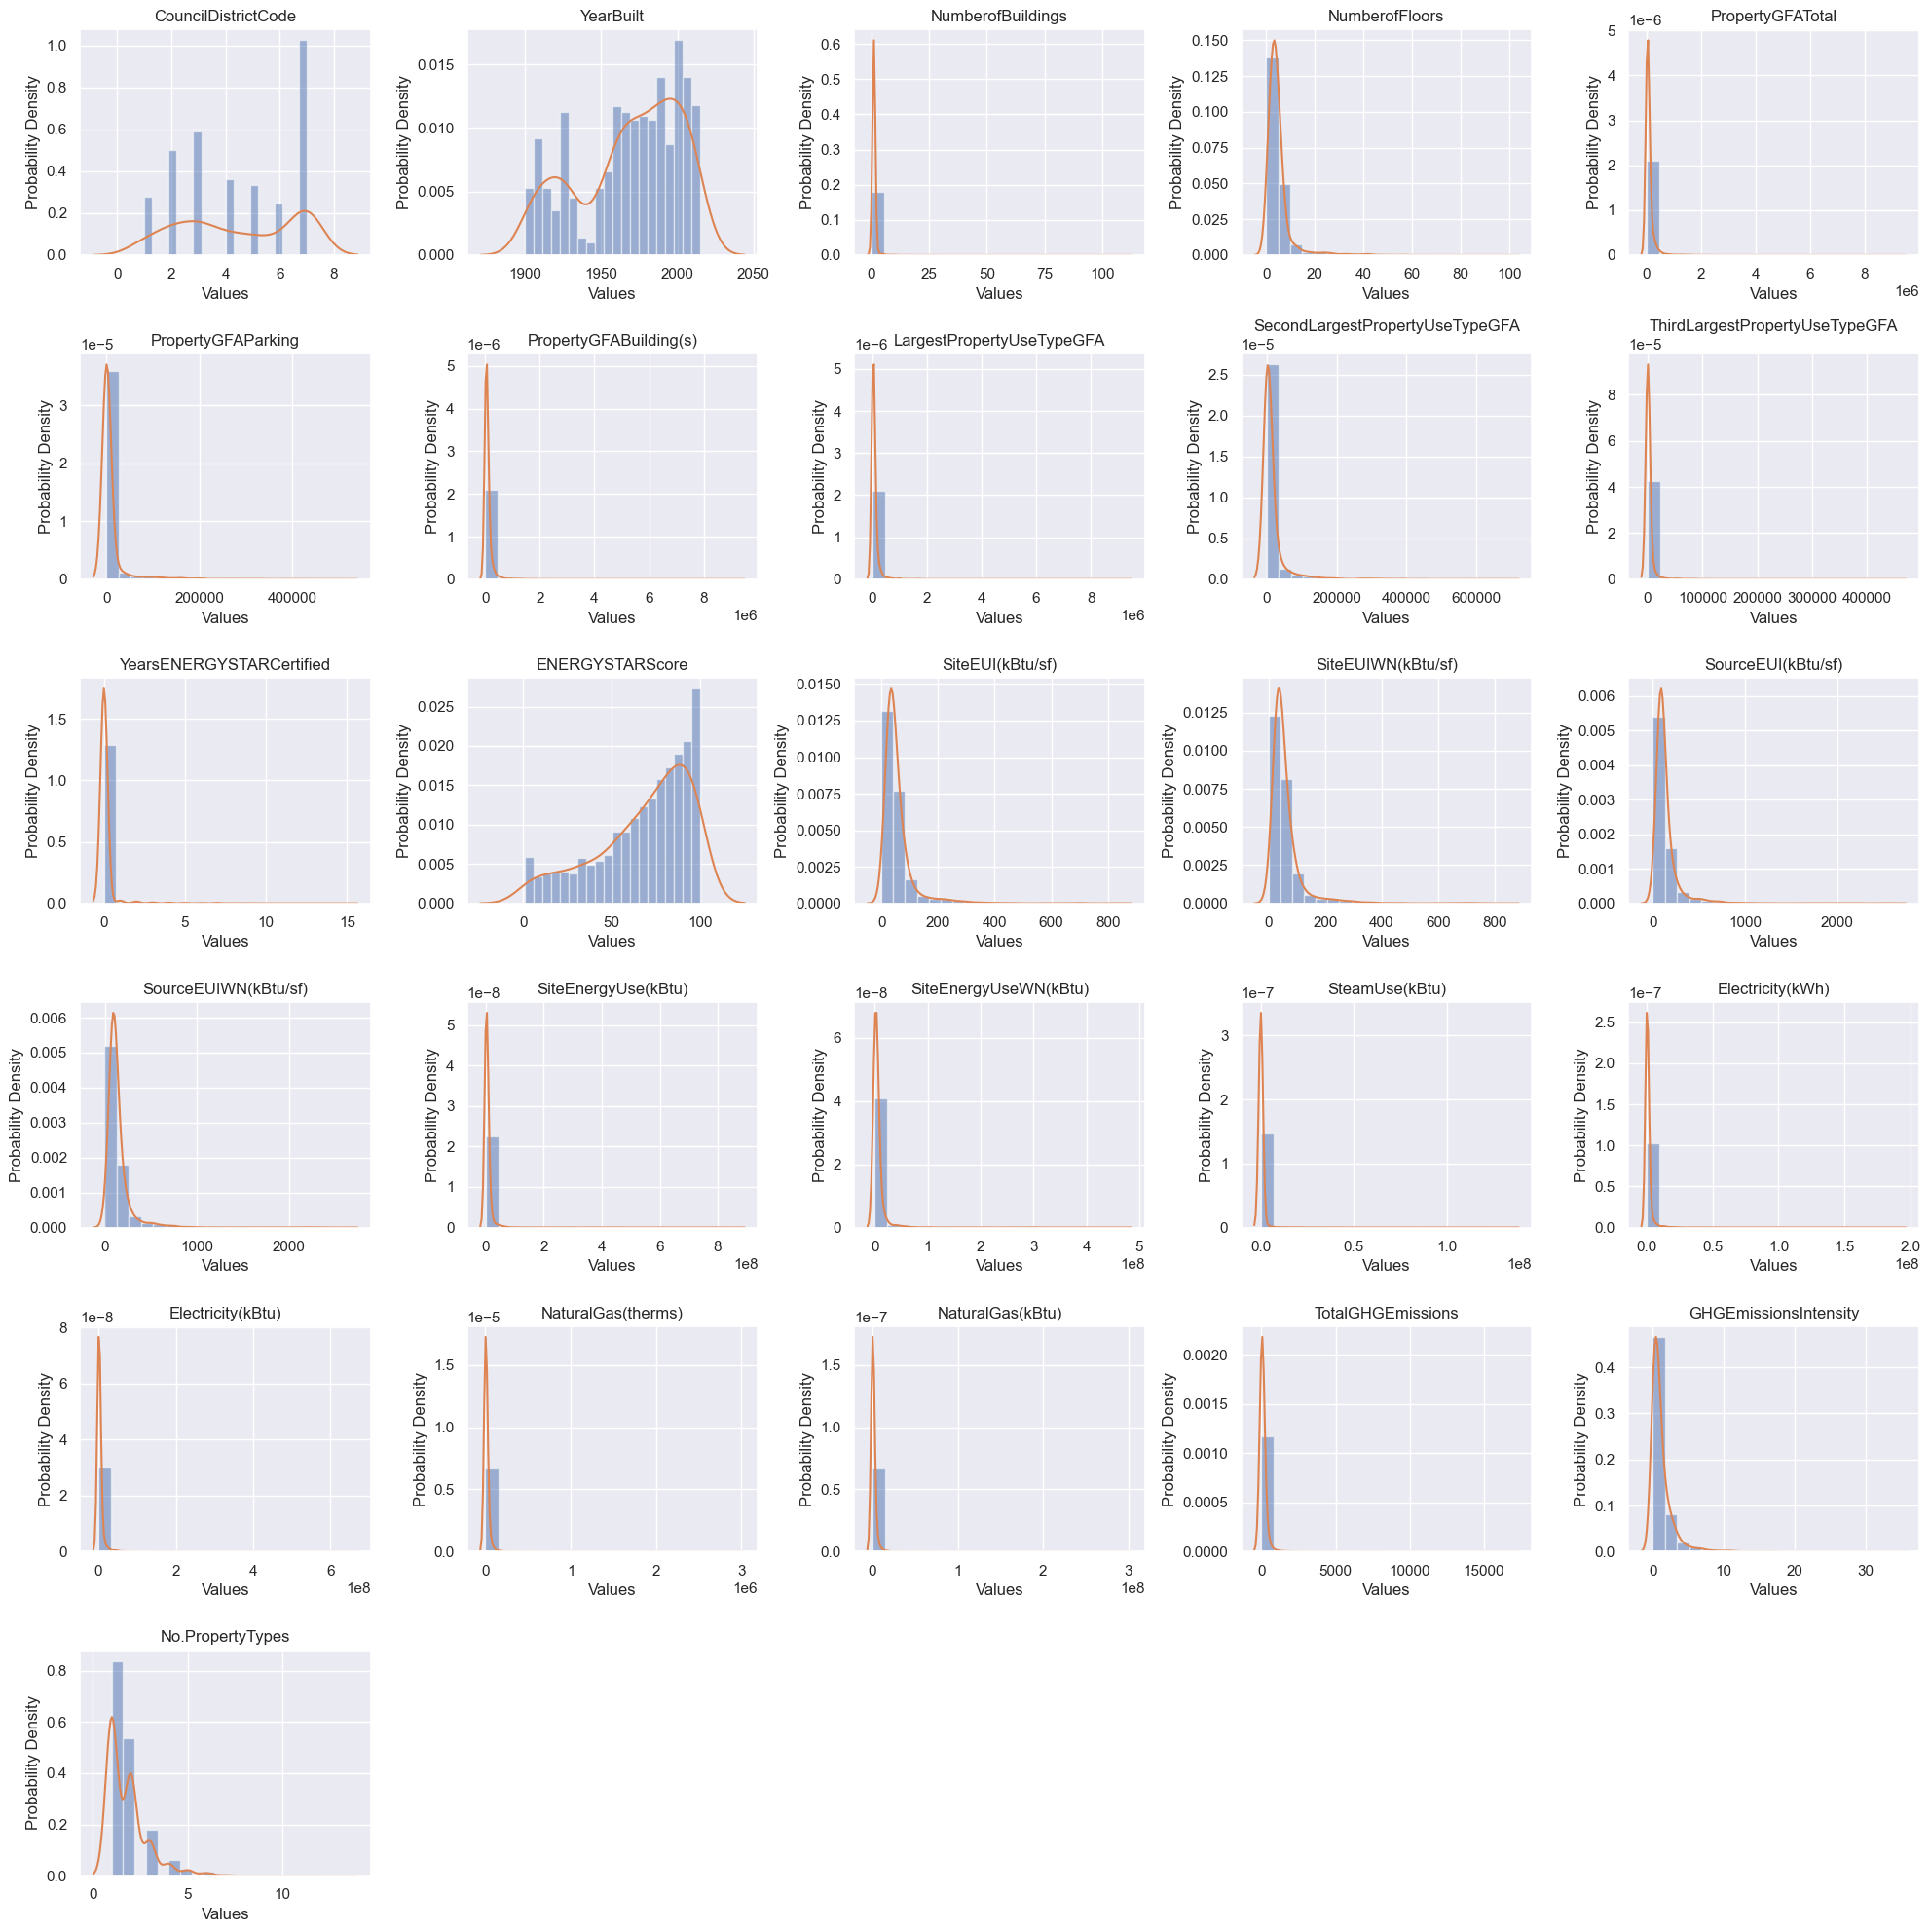

In [57]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plotting the histogram
axes = df.hist(figsize=(20,20), bins=20, density=True, alpha=0.5)

# Loop through axes and numeric columns to add KDE plot
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.kdeplot(df[col], bw_adjust=1.5, ax=ax, warn_singular=False)
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Probability Density')

# Show the plot
plt.tight_layout()
plt.show()

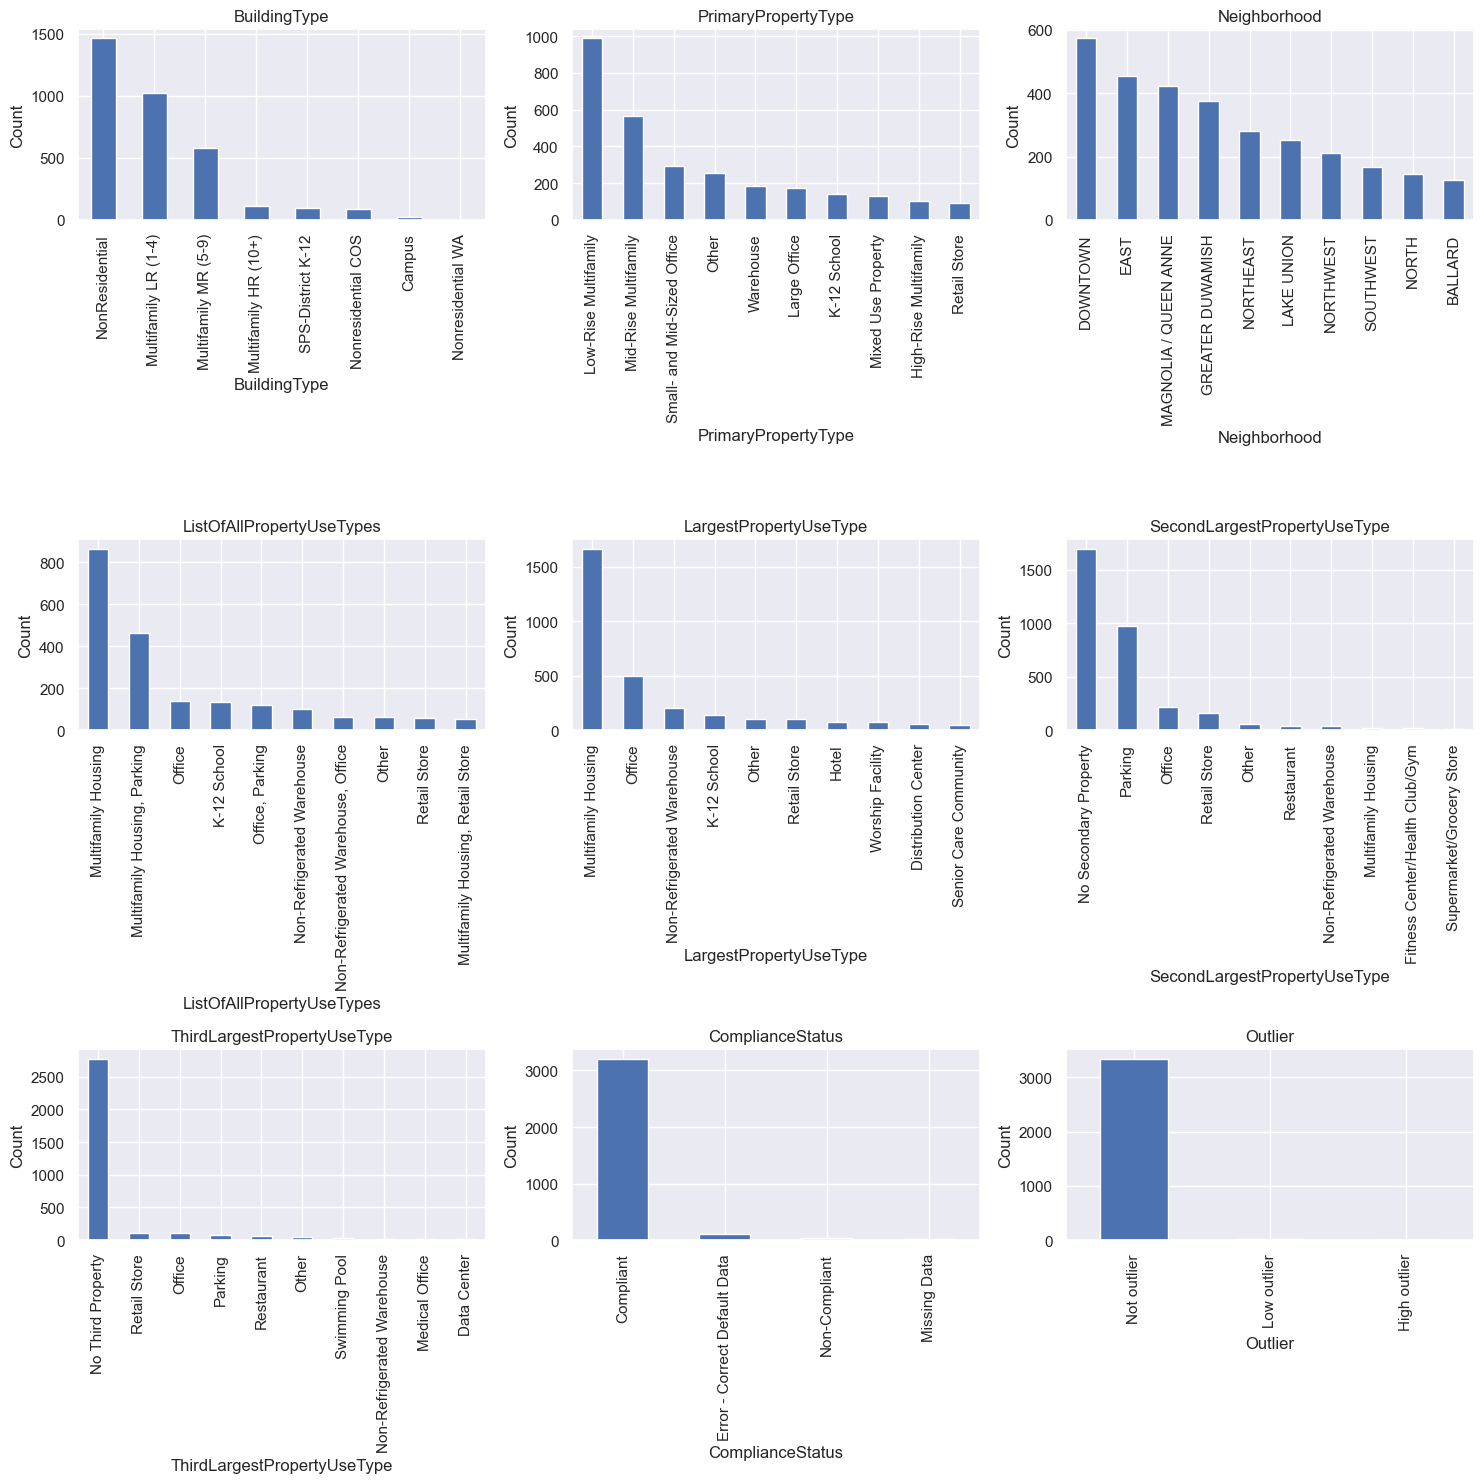

In [58]:
# Select columns with object data type from the DataFrame
encoded_df = df.select_dtypes(include='object')
object_cols = encoded_df.columns.to_list()

# Calculate number of rows needed for subplots
num_cols_per_row = 3
n = len(object_cols)
n_rows = (n + num_cols_per_row - 1) // num_cols_per_row  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, num_cols_per_row, figsize=(15, n_rows * 5))

# Plot the top 20 value counts for each object column
for index, (ax, col) in enumerate(zip(axes.flatten(), object_cols)):
    top_values = encoded_df[col].value_counts().head(10)
    top_values.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Count')

# Remove empty subplots
for i in range(n, n_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Multivariate

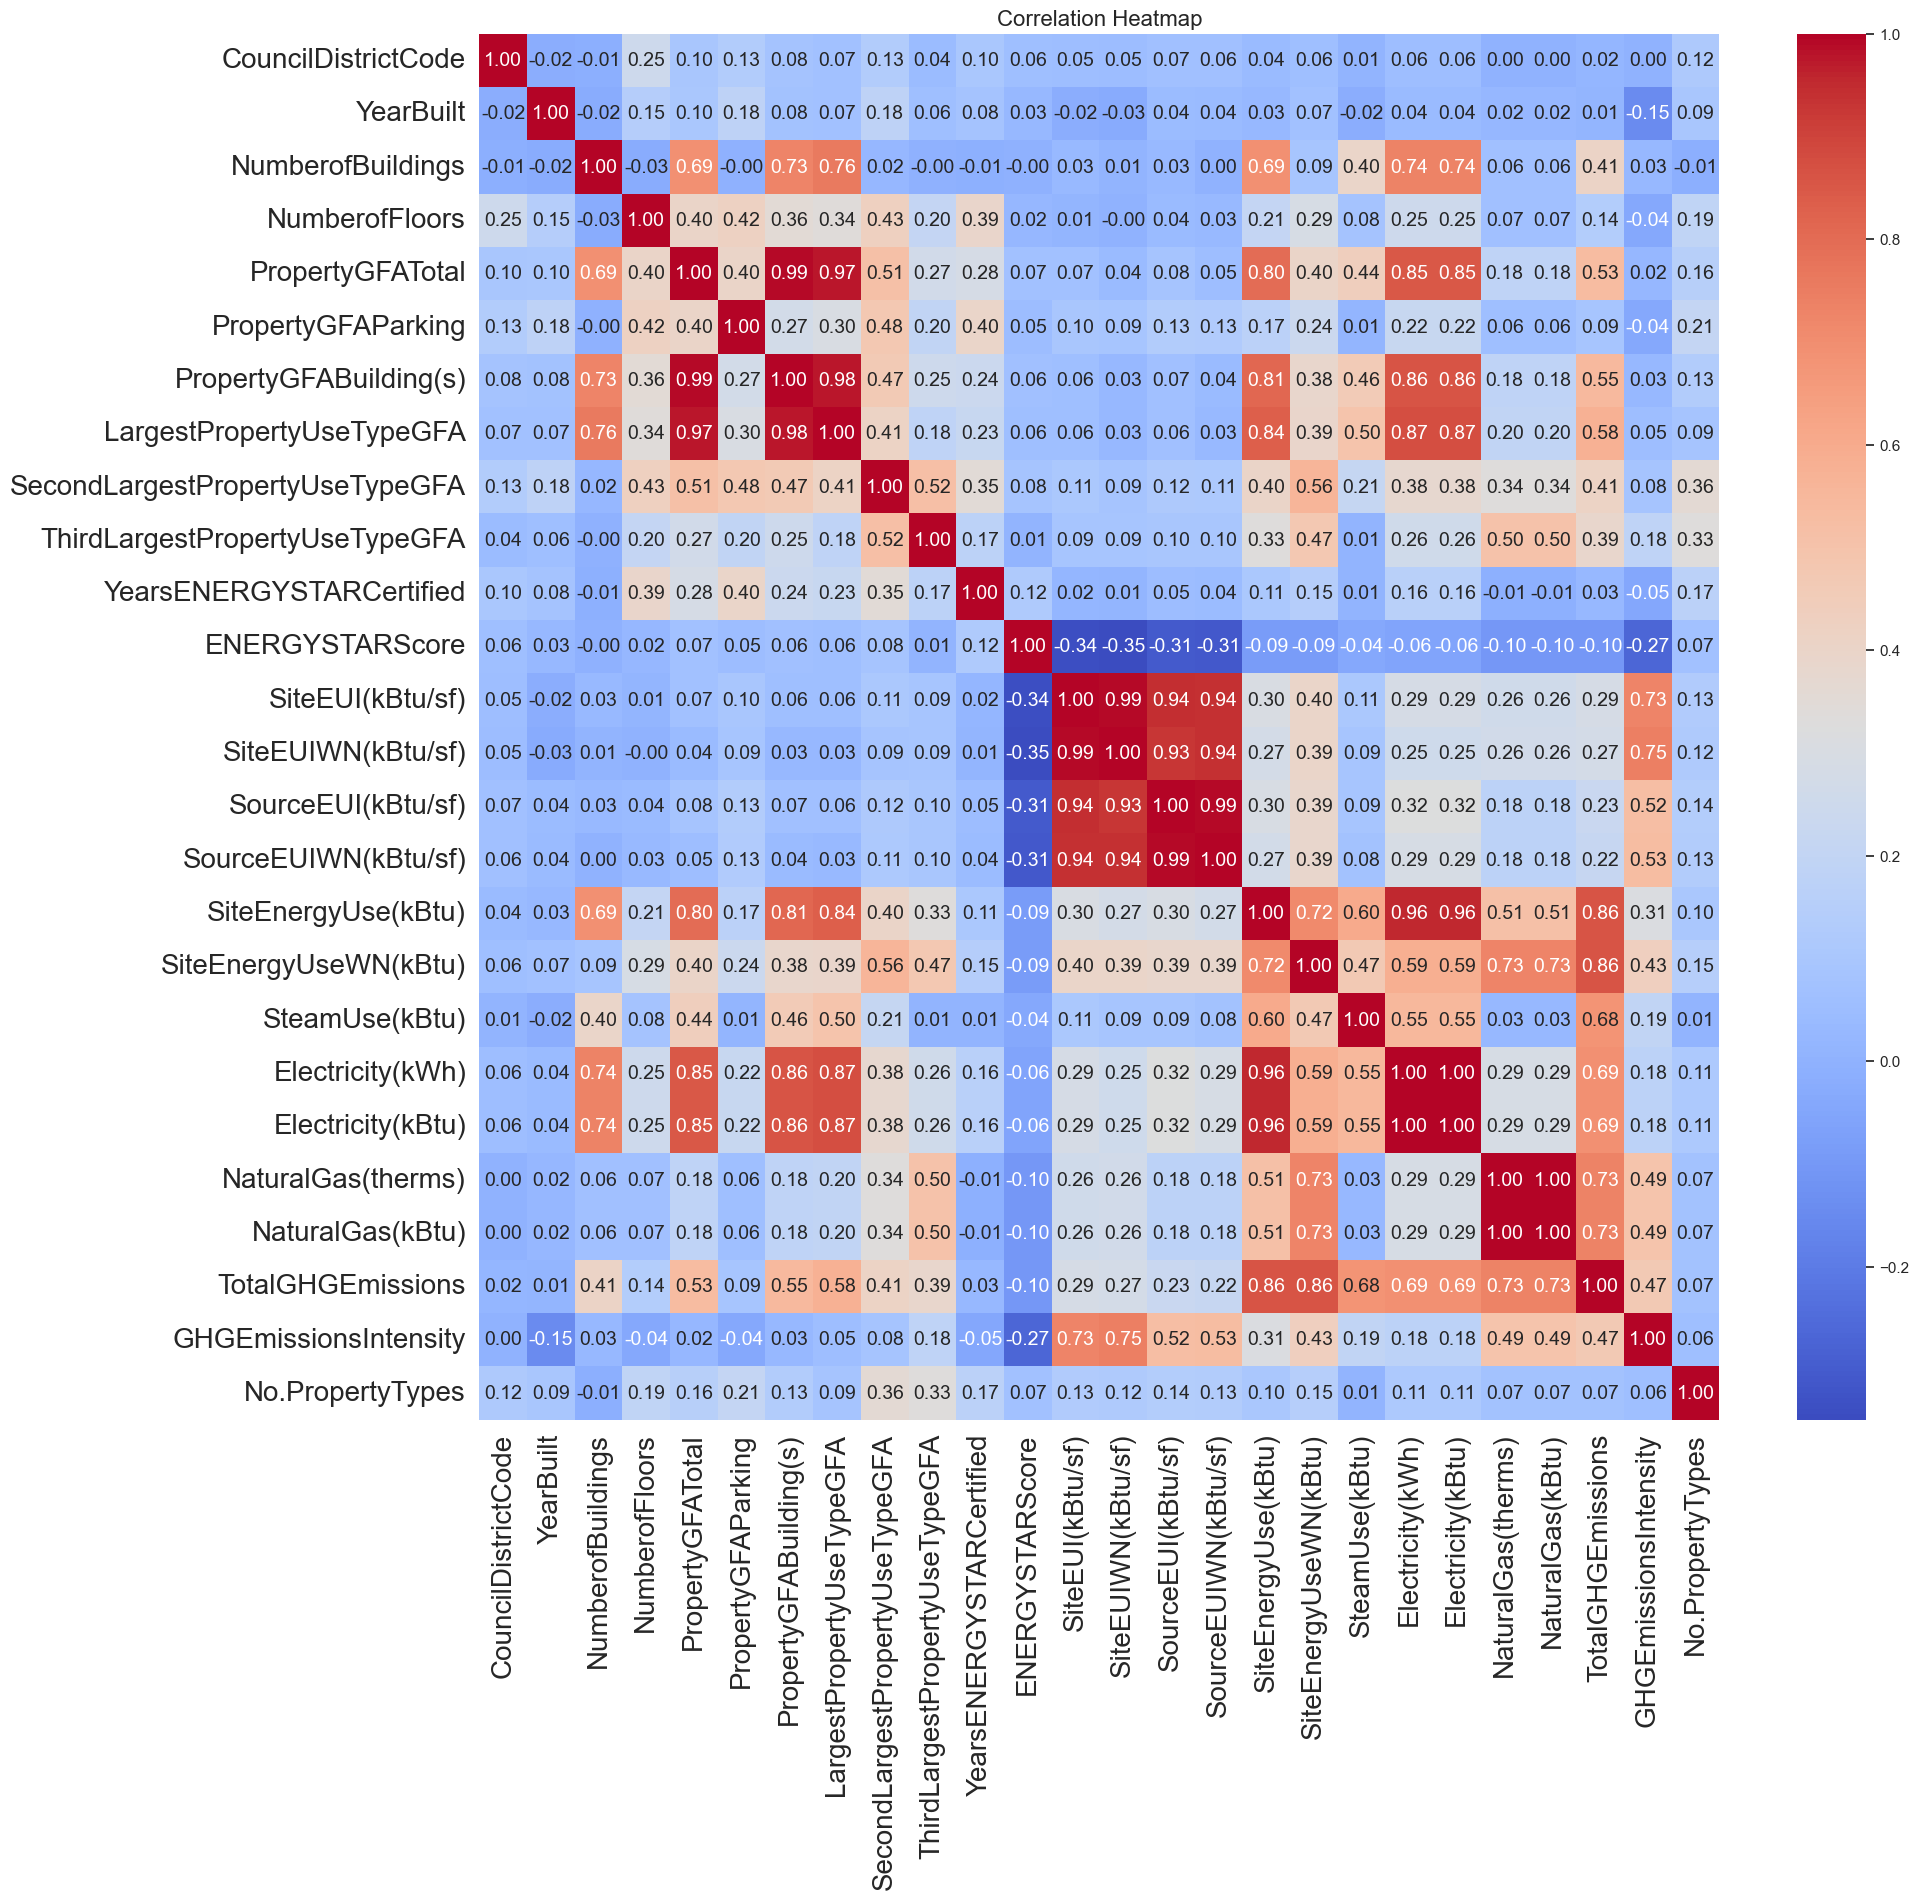

In [20]:
from sklearn.preprocessing import LabelEncoder



# 1. Correlation Heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 14},  # Adjust the annotation size
            #cbar_kws={'label': 'Correlation Coefficient', 'labelsize': 14}  # Adjust color bar label size
            )

# Adjust x and y tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Adjust title size
plt.title('Correlation Heatmap', fontsize=16)

plt.show()

In [21]:
for col in df.select_dtypes(include='object').columns.tolist():
    df[col] = LabelEncoder().fit_transform(df[col])

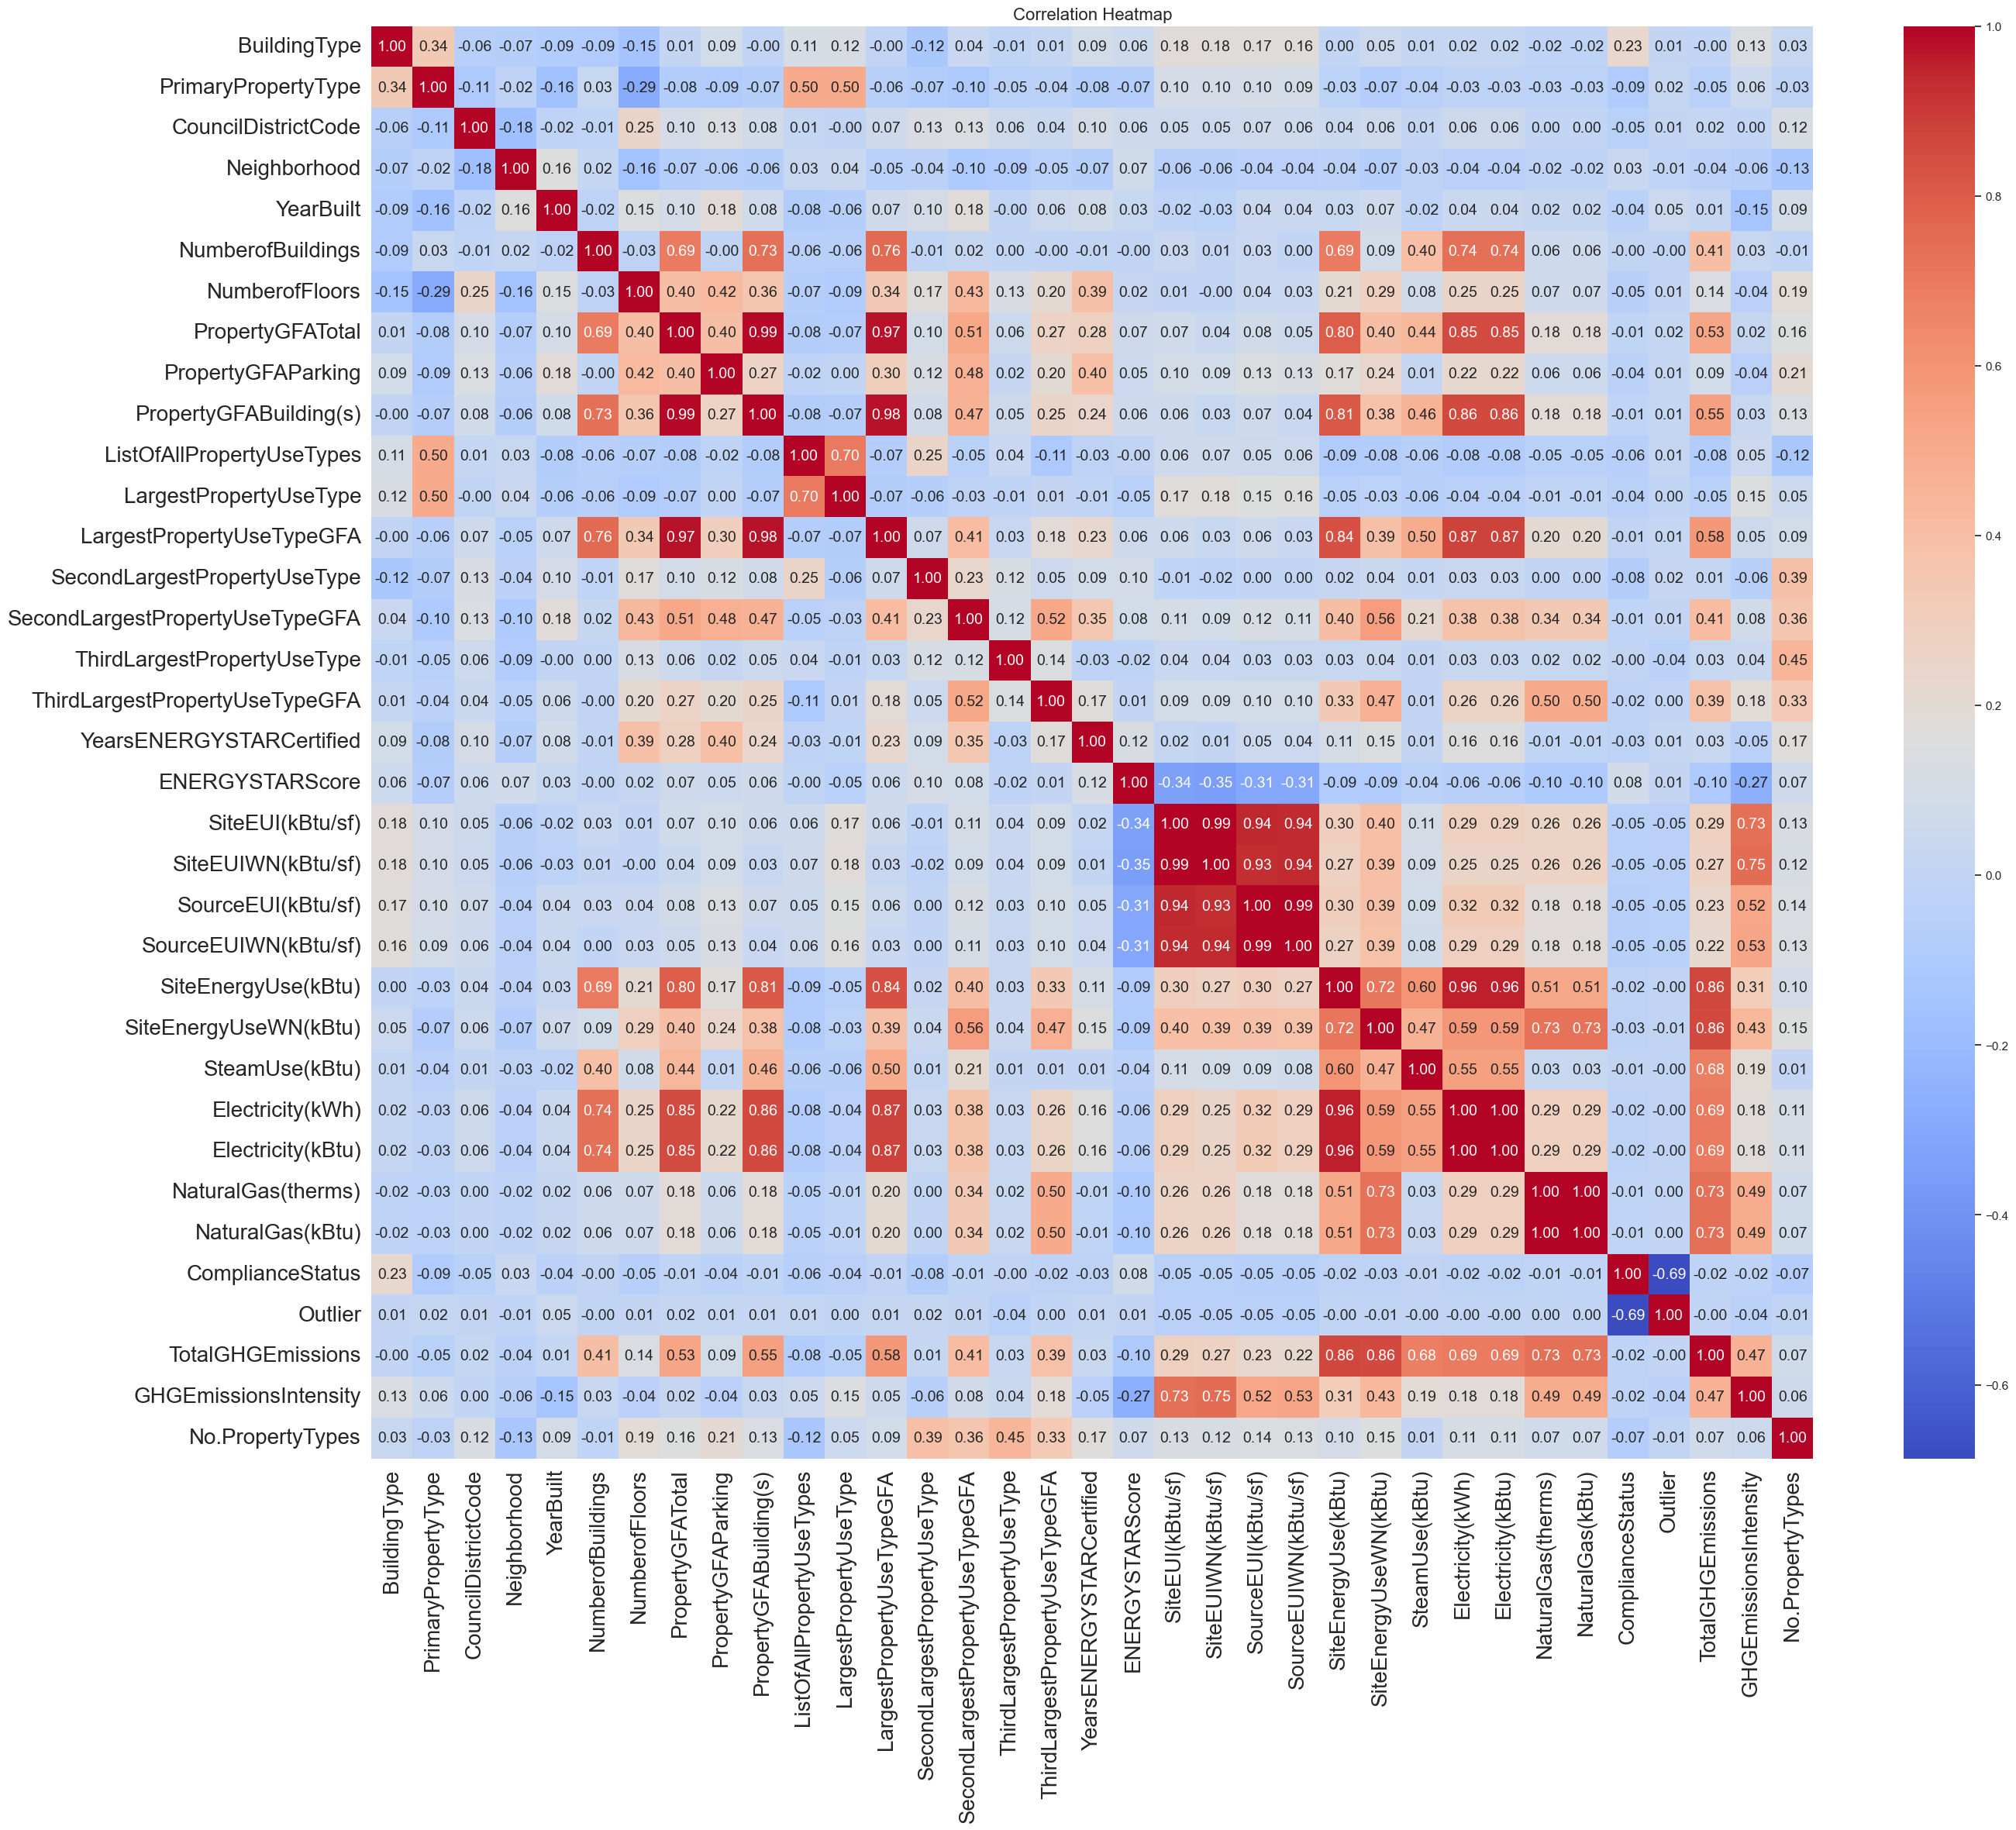

In [22]:
# 1. Correlation Heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 14},  # Adjust the annotation size
            #cbar_kws={'label': 'Correlation Coefficient', 'labelsize': 14}  # Adjust color bar label size
            )

# Adjust x and y tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Adjust title size
plt.title('Correlation Heatmap', fontsize=16)

plt.show()

In [23]:
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


In [25]:
def best_features_via_rfecv(df, target_col):
    # Splitting the dataframe into features and target
    X = df.drop(target_col, axis=1)
    y = df[target_col]

    # Splitting into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # List of regression models to consider
    models = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        #RandomForestRegressor(),
        #GradientBoostingRegressor(),
        #SVR(kernel='linear')
        #SVR(kernel='poly'),
        #SVR(kernel='rbf')
    ]
    
    best_rmse = np.inf  # to keep track of the best RMSE value
    best_features = None  # to keep track of the best features

    for model in models:
        # Apply RFECV
        selector = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        selector = selector.fit(X_train, y_train)

        # Transform training and testing sets
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)

        # Train model on transformed data
        model.fit(X_train_selected, y_train)

        # Predict and compute RMSE
        y_pred = model.predict(X_test_selected)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Check if the current model's RMSE is the best so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_features = X.columns[selector.support_].tolist()

        print(f"{model.__class__.__name__} RMSE: {rmse}")
        print(best_features)
        print(selector.ranking_)

    return best_features


In [22]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'No.PropertyTypes'],
      dtype='object')

In [ ]:
"SiteEnergyUseWN(kBtu)", "'GHGEmissionsIntensity'"

In [ ]:
"SiteEnergyUse(kBtu)", "TotalGHGEmissions" 

Premier Notebook:

# 1. Analyse Exploratoire

# 2. Feature Engineering

a. Encoding OneHot

b. Transfomration log-scale

c. Creation de nouvelles features (price / sqm) etc...

d. Drop des colonnes non essentielles / duplicated

totalEnergie (kwh) / totalEnergie (SBtU)




df_enriched = ....

df_enriched.to_csv('data_cleaned_for_ml.csv')


Second Notebook:

Contraintes: 

non destinés à l’habitation

tenter de prédire les émissions de CO2 et la consommation totale d’énergie


X = data.drop(['totalGHG', 'EnergySBTU'])

y_ghg = data['totalGHG']
y_energy = data['EnergySBTU']


# Modelling avec differents modeles (Prediction regression // Lineaire and Non Lineaire)

# Gridsearch permet de tester differents parametres

Y = f(x)

f simple (regression lineairee) // f peut egalement etre non continu

# Evaluation (MSE) 

Tableau comparatif avec les differents modeles et les resultats du MSE sur les deux targets (a savoir ghg // energy)
Conclure, cad voir les relations entre la varaible a predire et les variables donnees (feature importance)

# EnergyStarScore

-> Tester avec ou sans 

In [28]:
df

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,No.PropertyTypes
0,4,3,1.000000,6,0.234783,0.009009,0.121212,0.008288,0.000000,0.009102,157,13,0.009488,23,0.000000,17,0.000000,0.0,0.595960,0.097915,0.101031,0.069656,0.072881,0.008269,0.015811,0.014850,0.006180,0.006180,0.004285,0.004285,0,2,0.014864,0.083553,0.000000
1,4,3,1.000000,6,0.834783,0.009009,0.111111,0.009913,0.029387,0.009109,163,13,0.009000,35,0.021935,36,0.010053,0.0,0.606061,0.113615,0.117330,0.067214,0.069219,0.009598,0.018372,0.000000,0.005110,0.005110,0.017271,0.017271,0,2,0.017583,0.084433,0.166667
2,4,3,1.000000,6,0.600000,0.009009,0.414141,0.101497,0.383759,0.081120,157,13,0.081167,23,0.000000,17,0.000000,0.0,0.424242,0.115053,0.117090,0.092328,0.093894,0.083059,0.156775,0.159819,0.075537,0.075537,0.005014,0.005014,0,2,0.123880,0.064790,0.000000
3,4,3,1.000000,6,0.226087,0.009009,0.101010,0.005375,0.000000,0.006192,157,13,0.006579,23,0.000000,17,0.000000,0.0,0.555556,0.132790,0.135786,0.082519,0.086229,0.007775,0.014730,0.016410,0.004389,0.004389,0.006080,0.006080,0,2,0.017024,0.137496,0.000000
4,4,3,1.000000,6,0.695652,0.009009,0.181818,0.017649,0.120950,0.011801,168,13,0.013245,35,0.099030,42,0.000000,0.0,0.747475,0.137584,0.142258,0.080687,0.083025,0.016217,0.031077,0.000000,0.008345,0.008345,0.029553,0.029553,0,2,0.029980,0.085019,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,5,11,0.166667,9,0.782609,0.009009,0.010101,0.000108,0.000000,0.000929,333,24,0.001319,23,0.000000,17,0.000000,0.0,0.454545,0.082814,0.091922,0.061718,0.067961,0.000972,0.002000,0.000000,0.000973,0.000973,0.001093,0.001093,1,2,0.001289,0.050425,0.000000
3372,5,12,0.166667,6,0.904348,0.009009,0.010101,0.000507,0.000000,0.001327,412,31,0.001717,23,0.000000,17,0.000000,0.0,NaN,0.071189,0.078979,0.043588,0.046146,0.001087,0.002234,0.000000,0.000779,0.000779,0.001859,0.001859,0,2,0.001954,0.059513,0.000000
3373,5,12,1.000000,11,0.643478,0.009009,0.010101,0.000201,0.000000,0.001022,126,31,0.000814,11,0.008116,42,0.000000,0.0,NaN,0.525168,0.551414,0.284275,0.293620,0.006598,0.012836,0.000000,0.002903,0.002903,0.013339,0.013339,0,2,0.013297,0.498681,0.166667
3374,5,10,0.000000,9,0.773913,0.009009,0.010101,0.000303,0.000000,0.001123,106,31,0.000708,11,0.009466,33,0.001053,0.0,NaN,0.061122,0.066515,0.040191,0.043057,0.000823,0.001660,0.000000,0.000706,0.000706,0.001244,0.001244,0,2,0.001358,0.046614,0.333333


In [21]:
df['ENERGYSTARScore']

0       60.0
1       61.0
2       43.0
3       56.0
4       75.0
        ... 
3371    46.0
3372     NaN
3373     NaN
3374     NaN
3375     NaN
Name: ENERGYSTARScore, Length: 3376, dtype: float64

In [26]:
df1 = df.drop(columns=['GHGEmissionsIntensity', 'ENERGYSTARScore']).dropna().copy()
df2 = df.drop(columns=['TotalGHGEmissions', 'ENERGYSTARScore']).dropna().copy()
#df1 = df.drop(columns=['GHGEmissionsIntensity']).dropna().copy()
#df2 = df.drop(columns=['TotalGHGEmissions']).dropna().copy()

In [27]:
best_cols = best_features_via_rfecv(df1, 'TotalGHGEmissions')
print("Best features across all models:", best_cols)

LinearRegression RMSE: 1.783471082362379e-07
['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
[19 22 20 24 25  5 14 10  9  4 26 23  7 27 16 21  8 11  2  3  6 18  1 13
  1  1  1  1  1 15 12 17]
Ridge RMSE: 0.01326984319091398
['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
[20 26 21 25 22 13 15 17  7 16 28 23 12 24  6 27 10 11  9  5  8  4  1  1
  1  2  3  1  1 19 18 14]
Lasso RMSE: 0.03600877901478793
['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
[32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9
  8  7  6  5  4  3  2  1]
ElasticNet RMSE: 0.03600877901478793
['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
[32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14

In [32]:
len(df.columns.tolist())

35

In [29]:
len("19 22 20 24 25 5 14 10 9 4 26 23 7 27 16 21 8 11 2 3 6 18 1 13 1 1 1 1 1 15 12 17".split())

32

In [48]:
best_cols = best_features_via_rfecv(df2, 'GHGEmissionsIntensity')
print("Best features across all models:", best_cols)

LinearRegression RMSE: 0.06293260330307025
['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
Ridge RMSE: 0.027663577039980083
['YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
Lasso RMSE: 0.05565863108631703
['YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']
ElasticNet RMSE: 0.

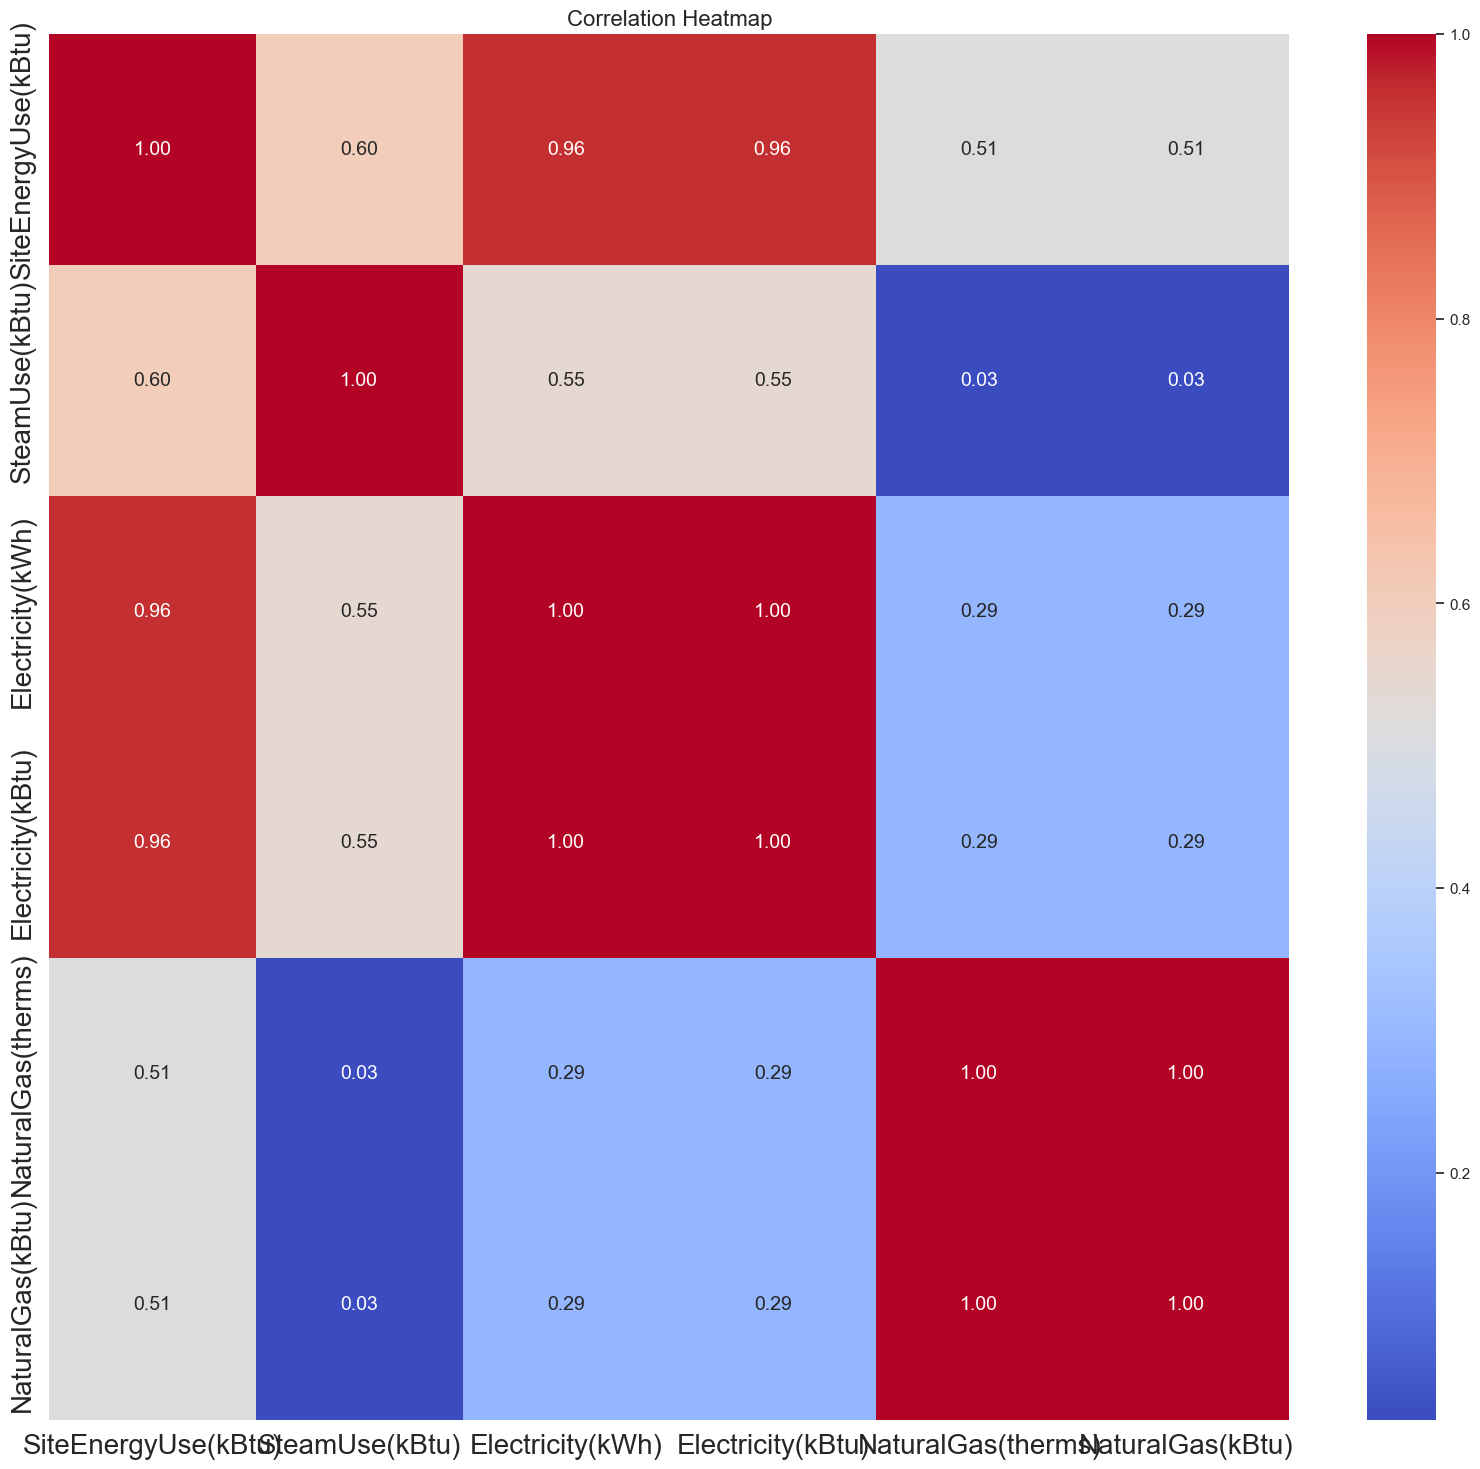

In [50]:
# 1. Correlation Heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(df[best_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 14},  # Adjust the annotation size
            #cbar_kws={'label': 'Correlation Coefficient', 'labelsize': 14}  # Adjust color bar label size
            )

# Adjust x and y tick label sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Adjust title size
plt.title('Correlation Heatmap', fontsize=16)

plt.show()

# Transform Categorical Variables

In [80]:
X.select_dtypes(include=[object]).columns.tolist()

DataYear                          int64
BuildingType                     object
PrimaryPropertyType              object
City                             object
State                            object
ZipCode                         float64
CouncilDistrictCode               int64
Neighborhood                     object
Latitude                        float64
Longitude                       float64
YearBuilt                         int64
NumberofBuildings               float64
NumberofFloors                    int64
PropertyGFATotal                  int64
PropertyGFAParking                int64
PropertyGFABuilding(s)            int64
ListOfAllPropertyUseTypes        object
LargestPropertyUseType           object
SecondLargestPropertyUseType     object
ThirdLargestPropertyUseType      object
YearsENERGYSTARCertified          int64
SiteEUI(kBtu/sf)                float64
SiteEUIWN(kBtu/sf)              float64
SourceEUI(kBtu/sf)              float64
SourceEUIWN(kBtu/sf)            float64


In [78]:
unique_percentage(X)

,unique_values,percentage_unique
DataYear,1,0.039651
BuildingType,7,0.277557
PrimaryPropertyType,19,0.753370
City,1,0.039651
State,1,0.039651
ZipCode,47,1.863600
CouncilDistrictCode,7,0.277557
Neighborhood,18,0.713719
Latitude,2225,88.223632
Longitude,2089,82.831086


In [8]:
# Assuming we have a dataframe called df
ohe = OneHotEncoder(drop='first', sparse_output=False)
target_enc = TargetEncoder()

# OneHotEncode low cardinality features
low_cardinality_features = ['BuildingType', 'City', 'State', 'CouncilDistrictCode', 'ComplianceStatus', 'Outlier']
encoded_low_cardinality = ohe.fit_transform(df[low_cardinality_features])

# TargetEncode high cardinality features (assuming the target variable is 'GHGEmissionsIntensity')
high_cardinality_features = ['PropertyName', 'Address']
encoded_high_cardinality = target_enc.fit_transform(df[high_cardinality_features], df['GHGEmissionsIntensity'])

# Dropping original columns and adding encoded ones
df.drop(columns=low_cardinality_features + high_cardinality_features, inplace=True)
df = pd.concat([df, pd.DataFrame(encoded_low_cardinality), pd.DataFrame(encoded_high_cardinality)], axis=1)


# Create New Variables from Existing Ones

In [8]:
df['AgeOfBuilding'] = 2023 - df['YearBuilt']  # Assuming current year is 2023
#df['AgeOfBuildingV2'] = df["DataYear"] - df['YearBuilt']

,OSEBuildingID,DataYear,PrimaryPropertyType,ZipCode,TaxParcelIdentificationNumber,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,TotalGHGEmissions,GHGEmissionsIntensity,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,PropertyName,Address
0,1,2016,Hotel,98101.0,0659000030,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,249.98,2.83,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.391127,1.391127
1,2,2016,Hotel,98101.0,0659000220,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,295.86,2.86,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.395030,1.395030
2,3,2016,Hotel,98101.0,0659000475,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,2089.28,2.19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.307857,1.307857
3,5,2016,Hotel,98101.0,0659000640,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,286.43,4.67,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.630526,1.630526
4,8,2016,Hotel,98121.0,0659000970,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,505.01,2.88,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.397632,1.397632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Office,NaN,1624049080,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,20.94,1.70,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.244104,1.244104
3372,50223,2016,Other,NaN,3558300000,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,32.17,2.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.284438,1.284438
3373,50224,2016,Other,NaN,1794501150,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,S

# Mathematical Transformations

In [ ]:
# Log transform
df['Log_SiteEnergyUse'] = np.log1p(df['SiteEnergyUse(kBtu)'])


# Normalize Variables 

In [ ]:


scaler = MinMaxScaler()
features_to_normalize = ['Latitude', 'Longitude']

df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


# Part 2

In [ ]:
# Checking correlation
correlation_matrix = df.corr()

# Checking high correlation with the target variables
high_corr_with_energy = correlation_matrix[abs(correlation_matrix['SiteEnergyUse(kBtu)']) > 0.9].index
high_corr_with_CO2 = correlation_matrix[abs(correlation_matrix['TotalGHGEmissions']) > 0.9].index

print("Features highly correlated with Energy Use:", high_corr_with_energy)
print("Features highly correlated with CO2 Emissions:", high_corr_with_CO2)


In [ ]:
# Splitting the data
X = df.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])
y_energy = df['SiteEnergyUse(kBtu)']
y_CO2 = df['TotalGHGEmissions']

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y_energy, test_size=0.2, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_CO2, test_size=0.2, random_state=42)

# Linear Model for energy consumption
linear_energy = LinearRegression()
linear_energy.fit(X_train_e, y_train_e)

# Linear Model for CO2 consumption
linear_CO2 = LinearRegression()
linear_CO2.fit(X_train_c, y_train_c)

# Non-linear Model for energy consumption
tree_energy = DecisionTreeRegressor()
tree_energy.fit(X_train_e, y_train_e)

# Non-linear Model for CO2 consumption
tree_CO2 = DecisionTreeRegressor()
tree_CO2.fit(X_train_c, y_train_c)

# You can similarly add more models like Ridge, RandomForest, etc.


# Part 3

In [ ]:

dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train_e, y_train_e)
dummy_rmse = np.sqrt(mean_squared_error(y_test_e, dummy.predict(X_test_e)))


In [ ]:

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_e, y_train_e)


In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")
